In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [2]:
beg_date = '2015-01-01'
end_date = '2017-01-01'

united = get_pricing('UAL', start_date=beg_date, end_date=end_date)
american = get_pricing('AAL', start_date=beg_date, end_date=end_date)

In [3]:
united.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,67.740,68.08,65.71,66.380,5678309.0,66.380
2015-01-05 00:00:00+00:00,66.870,67.35,65.50,66.140,4263592.0,66.140
2015-01-06 00:00:00+00:00,66.630,67.00,63.11,64.599,5422328.0,64.599
2015-01-07 00:00:00+00:00,64.959,66.11,64.00,65.530,4230901.0,65.530
2015-01-08 00:00:00+00:00,65.700,67.52,65.41,66.540,5515839.0,66.540


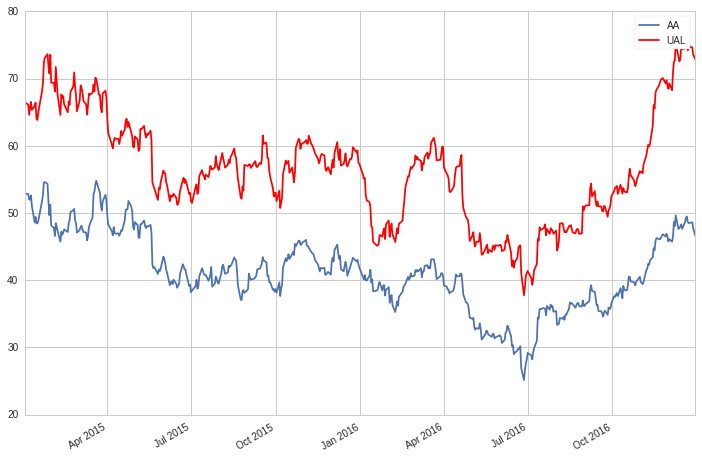

In [5]:
american['close_price'].plot(label='AA', figsize=(12,8))
united['close_price'].plot(label='UAL', c='red')
plt.legend()

In [6]:
# correlation showing them to be highly correlated
# as a result, pairs trading is to arbitrage instances where the two stocks move differently
# due to expected mean reversion
np.corrcoef(american['close_price'], united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

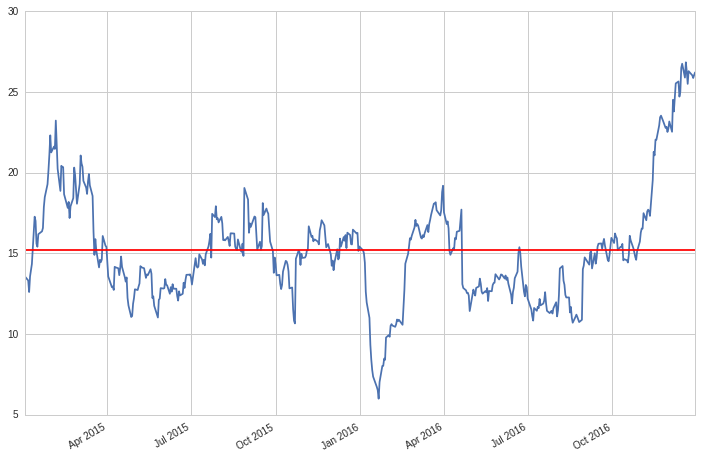

In [9]:
# plot the spread between the two stocks as well as to put a horizontal line where the mean is
spread = united['close_price'] - american['close_price']
spread.plot(label='Spread', figsize=(12,8))
plt.axhline(spread.mean(), c='red')

In [10]:
# now create a function to normalize the spread
def z_score(stocks):
    return (stocks - stocks.mean()) / np.std(stocks) 

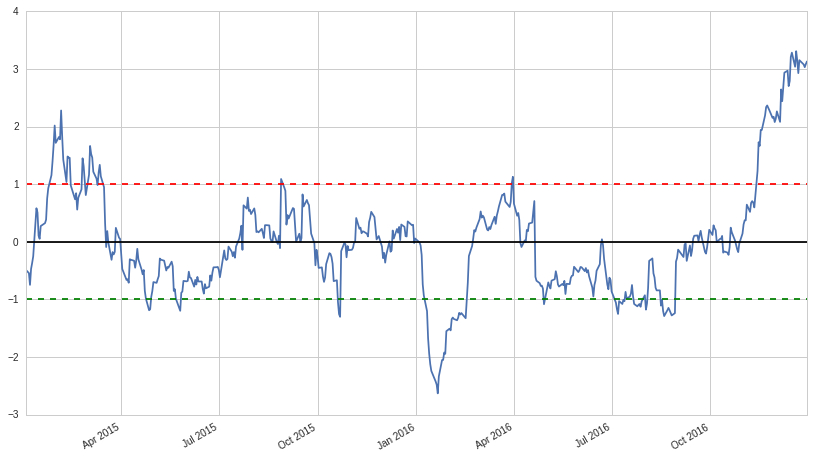

In [12]:
# graph the normalized spread and couple with a horizontal mean line
z_score(spread).plot(figsize=(14,8))
plt.axhline(z_score(spread).mean(), c='black')
plt.axhline(1.0, c='red', ls='--')
plt.axhline(-1.0, c='green', ls='--')

In [13]:
# calculate a rolling z-score
# one day moving average
spread_mav1 = spread.rolling(1).mean()

# 30 day moving average
spread_mav30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()

z_score30_1 = (spread_mav1 - spread_mav30) / std_30

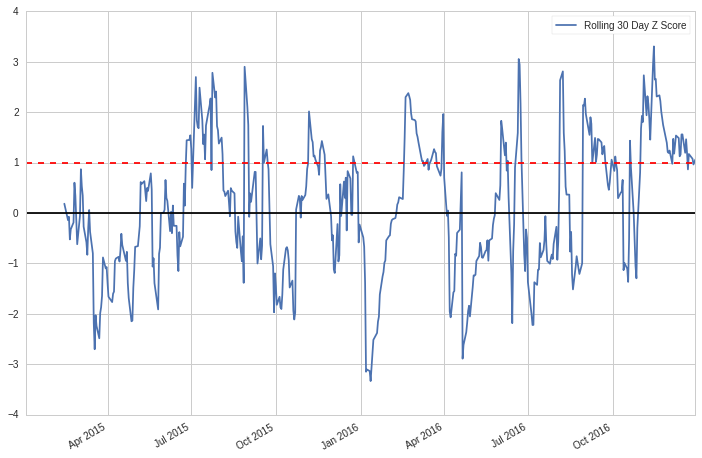

In [15]:
z_score30_1.plot(figsize=(12,8), label='Rolling 30 Day Z Score')
plt.axhline(0, color='black')
plt.axhline(1.0, ls='--', c='red')
plt.legend()